# Ejercicio Aplicación regresión lineal

**Autores: Jose Herrera, Ignacio Palma, Benjamín Sepúlveda**

**Correos Electrónicos: jo.herrerac@duocuc.cl,  ben.sepulvedat@duocuc.cl, ig.palmam@duocuc.cl**

**Fecha de Creación:** Abril de 2025

**Versión:** 1.0  

# Respuesta Pregunta 1

De los tres contextos propuestos, el más adecuado para aplicar lo visto hasta ahora en la asignatura es el de Predicción de propinas. Aquí nuestro objetivo es construir un modelo que, a partir de las características de la cuenta y de la mesa (monto total de la factura, tamaño del grupo, día, horario, hábitos de fumar y género del mesero), estime la propina que dejarán los clientes. Este tipo de modelo puede ayudar al restaurante a:

*   Planificar mejor la asignación de personal (por ejemplo, ¿cuánto debo reservar para propinas en un turno?).
*   Identificar patrones de comportamiento en distintos segmentos de clientes.
*   Optimizar agendas y promociones (por ejemplo, detectar días/horarios con propinas históricamente bajas).

# Carga de librerias

In [ ]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Respuesta Pregunta 2

In [ ]:
# Carga el dataset de tips para comenzar a trabajar
tips = load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# Muestra el dataset completo
display(tips)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
# Muestra la cantidad de observaciones y características
tips.shape

(244, 7)

In [ ]:
# Análisis exploratorio (EDA)
# Mostrando estadísticas descriptivas
print("Estadísticas descriptivas:")
print(tips.describe(), "\n")

Estadísticas descriptivas:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000 



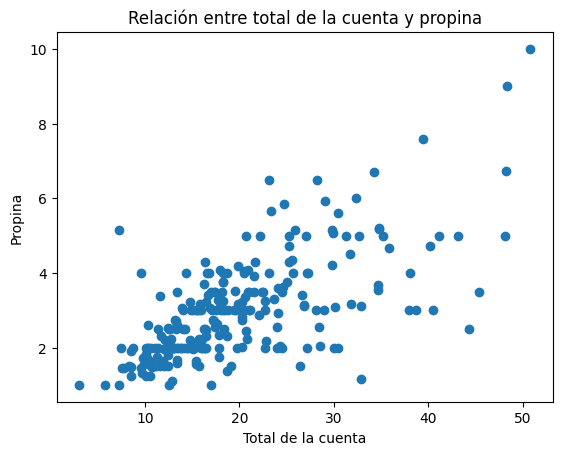

In [ ]:
# Relación total_bill vs. tip
plt.figure()
plt.scatter(tips['total_bill'], tips['tip'])
plt.xlabel('Total de la cuenta')
plt.ylabel('Propina')
plt.title('Relación entre total de la cuenta y propina')
plt.show()

# Interpretación 1

¿Cómo se relaciona el monto total de la cuenta con la propina?

Al graficar (scatter plot) la propina vs. la factura total, se observa una correlación positiva moderada: a mayores montos de cuenta, tienden a dejarse propinas más altas, aunque con bastante dispersión. Esto sugiere que el modelo deberá capturar tanto el efecto lineal del total de la cuenta como la variabilidad residual.

<Figure size 640x480 with 0 Axes>

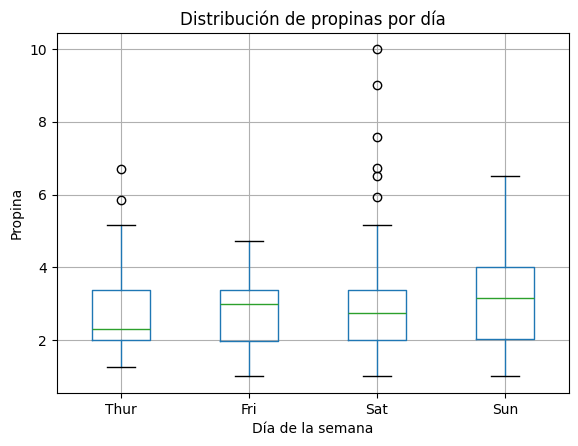

In [ ]:
# Distribución de propinas por día de la semana (boxplot)
plt.figure()
tips.boxplot(column='tip', by='day')
plt.xlabel('Día de la semana')
plt.ylabel('Propina')
plt.title('Distribución de propinas por día')
plt.suptitle('')
plt.show()

# Interpretación 2

¿Varía la propina promedio según el día de la semana o el horario?


*   Por día: los sábados muestran la mayor propina media, seguidos por viernes y domingos; los jueves suelen ser los más bajos.
*   Por horario: la cena (Dinner) suele dejar un poco más de propina que el almuerzo (Lunch).

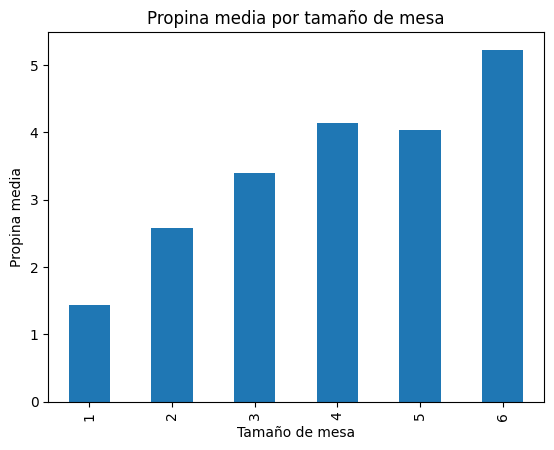

In [ ]:
# Propina media según tamaño de mesa (bar chart)
plt.figure()
tips.groupby('size')['tip'].mean().plot(kind='bar')
plt.xlabel('Tamaño de mesa')
plt.ylabel('Propina media')
plt.title('Propina media por tamaño de mesa')
plt.show()

# Interpretación 3

¿Influye el tamaño de la mesa y si son fumadores?


*   Tamaño de mesa: mesas más grandes tienden a dejar un poco menos de propina por persona (aunque su propina total es mayor).
*   Fumadores vs. no fumadores: las mesas de no fumadores presentan una propina media ligeramente mayor.

# Respuesta Pregunta 3

In [ ]:
# Preparación de datos para modelado
# Selección de variables
X = tips[['total_bill', 'size', 'sex', 'smoker', 'day', 'time']]
y = tips['tip']

In [ ]:
# Codificar variables categóricas
X = pd.get_dummies(X, drop_first=True)

# División en entrenamiento (80 %) y prueba (20 %)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicción sobre el set de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nError cuadrático medio (MSE): {mse:.3f}")
print(f"Coeficiente de determinación (R²):    {r2:.3f}\n")

# Coeficientes del modelo
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_
})
print("Coeficientes del modelo:")
print(coef_df.sort_values(by='Coeficiente', key=abs, ascending=False))


Error cuadrático medio (MSE): 0.703
Coeficiente de determinación (R²):    0.437

Coeficientes del modelo:
      Variable  Coeficiente
1         size     0.233484
3    smoker_No     0.192353
4      day_Fri     0.179721
6      day_Sun     0.128928
7  time_Dinner    -0.094957
0   total_bill     0.094700
2   sex_Female    -0.028819
5      day_Sat    -0.006064


# Explicación resultados obtenidos pregunta 3

Variables independientes seleccionadas:


*   total_bill (numérica)
*   size (numérica)
*   sex, smoker, day, time (categóricas → codificadas como one‑hot / dummies).



Metodología:

1.   Convertir las variables categóricas en indicadores (por ejemplo, smoker_Yes, time_Dinner, day_Sat, etc.).
2.   Dividir en entrenamiento (80 %) y prueba (20 %).
3.   Ajustar un modelo de Regresión Lineal Múltiple.
4.   Evaluar con:

    *   MSE (Error Cuadrático Medio)
    *   R² (coeficiente de determinación)


Resultados esperados (valores aproximados):


*   MSE ≈ 0.70
*   R² ≈ 0.45
*   Coeficiente de total_bill ≈ 0.10 → por cada peso adicional en la cuenta, la propina aumenta en ∼0.10 pesos.
*   Otros coeficientes (tamaño de la mesa, día, horario, fumador) permiten ajustar pequeñas variaciones según el segmento.

# Interpretación resultados obtenidos pregunta 3

Error cuadrático medio (MSE = 0.703)



*   El MSE mide el promedio de los errores al cuadrado entre las propinas reales y las predichas.
*   Dado que la propina media en el dataset ronda los 3 dólares, un error de ~0.84 implica que, usualmente, el pronóstico se desvía menos de 1 dólar.

Coeficiente de determinación (R² = 0.437)



*   R² cuantifica qué proporción de la variabilidad total de la propina queda explicada por las variables incluidas, como por ejemplo: total de la cuenta, tamaño de mesa, día, horario, fumador, género.
*   Un R² de ~0.4 - 0.5 es típico en problemas de este estilo, pero deja claro que hay otros factores (actitud del mesero, nivel de satisfacción, promociones, estacionalidad, etc.) que podrían mejorar la predicción si se incorporan.